# Description
The following analysis was made using the last seven years of third Friday enrollment data.

I am a software engineer and I used this background to compile the data and present analysis from it. **I am not a statistician.**

## Compiling the Initial Dataset
The third Friday counts were provided as a PDF. I manually entered that data into a spreadsheet, then extracted the data, and reshaped it to long-form for further analysis.

In [1]:
from pyexcel_ods3 import get_data
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from numbers import Number


def as_percent(v, precision='0.2'):
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")


register_matplotlib_converters()
pd.options.display.max_rows = 14

df = pd.DataFrame()
for date, rows in get_data("Third Friday.ods").items():
    ydf = pd.DataFrame(rows[1:], columns=rows[0])
    ydf['Date'] = pd.to_datetime(date)
    ydf = ydf.replace(r'^\s*$', np.NaN, regex=True)
    ydf['School'] = ydf['School'].fillna(method='ffill')
    ydf = pd.melt(ydf, id_vars=['Date', 'School'], var_name='Grade', value_name='Students')
    ydf = ydf[ydf['Students'].notnull()]

    df = df.append(ydf)

df['Grade'] = pd.Categorical(df['Grade'], ['Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])

display(df.set_index(['Date','School','Grade']))

Students
Date       School    Grade            
2019-09-20 Davey     Grade K      20.0
                     Grade K      18.0
                     Grade K      19.0
           Flynn     Grade K      11.0
                     Grade K      12.0
                     Grade K      13.0
           Lakeshore Grade K      15.0
...                                ...
2013-09-20 Robbins   Grade 5      25.0
                     Grade 5      26.0
           Roosevelt Grade 5      20.0
                     Grade 5      21.0
           Sherman   Grade 5      23.0
                     Grade 5      22.0
                     Grade 5      23.0

[1489 rows x 1 columns]

## Classrooms per School Analysis
The most basic analysis we can do is comparing the number of classrooms in use at a school to the schools stated section size.

*Available Classrooms is calculated as `6 * school sections`.*

In [2]:
classrooms_per_school_year = df.groupby(['Date','School']).count().rename(columns={'Students':'Classrooms in Use'})

cdf = pd.DataFrame([('Davey', 18),('Flynn', 12),('Lakeshore', 18),('Locust Lane', 18),('Longfellow', 18),('Manz', 18),('Meadowview', 18),('Northwoods', 18),('Putnam Heights', 18),('Robbins', 24),('Roosevelt',12),('Sherman',24)], columns=['School','Available Classrooms'])
classroom_utilization_per_school_year = classrooms_per_school_year.reset_index().merge(cdf)

for schoolName, school_classroom_utilization_per_year in classroom_utilization_per_school_year.groupby(['School']):
    display(Markdown(f'### {schoolName}'))
    display(school_classroom_utilization_per_year[['Date','Classrooms in Use','Available Classrooms']].set_index(['Date']).sort_values('Date', ascending=False))

### Davey

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,15,18
2018-09-21,15,18
2017-09-15,16,18
2016-09-16,17,18
2015-09-18,17,18
2014-09-19,17,18
2013-09-20,18,18


### Flynn

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,14,12
2018-09-21,14,12
2017-09-15,14,12
2016-09-16,15,12
2015-09-18,16,12
2014-09-19,16,12
2013-09-20,15,12


### Lakeshore

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,21,18
2018-09-21,20,18
2017-09-15,19,18
2016-09-16,21,18
2015-09-18,23,18
2014-09-19,23,18
2013-09-20,23,18


### Locust Lane

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,15,18
2018-09-21,14,18
2017-09-15,13,18
2016-09-16,13,18
2015-09-18,16,18
2014-09-19,16,18
2013-09-20,16,18


### Longfellow

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,15,18
2018-09-21,14,18
2017-09-15,14,18
2016-09-16,14,18
2015-09-18,16,18
2014-09-19,16,18
2013-09-20,17,18


### Manz

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,18,18
2018-09-21,21,18
2017-09-15,20,18
2016-09-16,19,18
2015-09-18,18,18
2014-09-19,17,18
2013-09-20,17,18


### Meadowview

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,19,18
2018-09-21,20,18
2017-09-15,20,18
2016-09-16,20,18
2015-09-18,19,18
2014-09-19,18,18
2013-09-20,18,18


### Northwoods

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,17,18
2018-09-21,18,18
2017-09-15,18,18
2016-09-16,18,18
2015-09-18,18,18
2014-09-19,17,18
2013-09-20,17,18


### Putnam Heights

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,18,18
2018-09-21,18,18
2017-09-15,18,18
2016-09-16,18,18
2015-09-18,17,18
2014-09-19,17,18
2013-09-20,18,18


### Robbins

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,23,24
2018-09-21,21,24
2017-09-15,22,24
2016-09-16,22,24
2015-09-18,20,24
2014-09-19,21,24
2013-09-20,24,24


### Roosevelt

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,12,12
2018-09-21,12,12
2017-09-15,12,12
2016-09-16,13,12
2015-09-18,14,12
2014-09-19,15,12
2013-09-20,13,12


### Sherman

,Classrooms in Use,Available Classrooms
Date,,
2019-09-20,22,24
2018-09-21,20,24
2017-09-15,21,24
2016-09-16,22,24
2015-09-18,23,24
2014-09-19,24,24
2013-09-20,24,24


We cannot compare two schools classroom usage unless they have the same scale. We can apply a uniform scale to the data by taking `the number of classrooms in use / number of available classrooms`.

*Editorial decision: I have selected a center of 100% for the heatmap color gradient.*

School,Davey,Flynn,Lakeshore,Locust Lane,Longfellow,Manz,Meadowview,Northwoods,Putnam Heights,Robbins,Roosevelt,Sherman
Date,,,,,,,,,,,,
2019-09-20,83.33%,116.67%,116.67%,83.33%,83.33%,100.00%,105.56%,94.44%,100.00%,95.83%,100.00%,91.67%
2018-09-21,83.33%,116.67%,111.11%,77.78%,77.78%,116.67%,111.11%,100.00%,100.00%,87.50%,100.00%,83.33%
2017-09-15,88.89%,116.67%,105.56%,72.22%,77.78%,111.11%,111.11%,100.00%,100.00%,91.67%,100.00%,87.50%
2016-09-16,94.44%,125.00%,116.67%,72.22%,77.78%,105.56%,111.11%,100.00%,100.00%,91.67%,108.33%,91.67%
2015-09-18,94.44%,133.33%,127.78%,88.89%,88.89%,100.00%,105.56%,100.00%,94.44%,83.33%,116.67%,95.83%
2014-09-19,94.44%,133.33%,127.78%,88.89%,88.89%,94.44%,100.00%,94.44%,94.44%,87.50%,125.00%,100.00%
2013-09-20,100.00%,125.00%,127.78%,88.89%,94.44%,94.44%,100.00%,94.44%,100.00%,100.00%,108.33%,100.00%


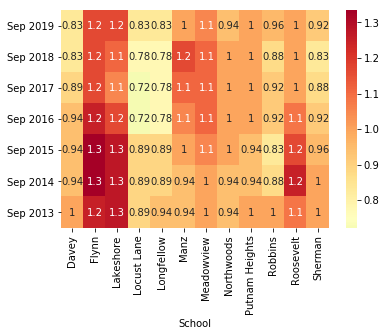

In [3]:
classroom_utilization_per_school_year['Classroom Utilization Ratio'] = (classroom_utilization_per_school_year['Classrooms in Use'] / classroom_utilization_per_school_year['Available Classrooms'])
classroom_utilization_per_school_year['Classroom Utilization Percent'] = classroom_utilization_per_school_year['Classroom Utilization Ratio'].apply(as_percent)

display(classroom_utilization_per_school_year[['Date','School','Classroom Utilization Percent']].set_index(['Date','School']).unstack()['Classroom Utilization Percent'].sort_values('Date', ascending=False))

classroom_utilization_per_school_year = classroom_utilization_per_school_year[['Date','School','Classroom Utilization Ratio']].set_index(['Date','School']).unstack()['Classroom Utilization Ratio'].sort_values('Date', ascending=False)
classroom_utilization_per_school_year.index = classroom_utilization_per_school_year.index.strftime('%b %Y')
sns.heatmap(classroom_utilization_per_school_year, center=.75, annot=True, cmap="RdYlGn_r")

plt.yticks(rotation=0)
plt.show()

This measurement is step-wise -- the ratio will not change until a new classroom is allocated. It does not indicate how close a school is to needing to allocate a new classroom.

If we take the `number of students in a grade / (maximum number of students per classroom * sections at school)`, it's possible to get insight into how close a grade at a school is to needing a new classroom.

*Editorial decision: I have selected a center of 75% for the heatmap color gradient.*

### Davey

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,76.00%,80.00%,66.67%,89.33%,56.32%,63.22%
2018-09-21,78.67%,66.67%,90.67%,62.67%,67.82%,80.46%
2017-09-15,62.67%,82.67%,61.33%,73.33%,83.91%,67.82%
2016-09-16,81.33%,54.67%,73.33%,89.33%,68.97%,82.76%
2015-09-18,54.67%,81.33%,85.33%,76.00%,77.01%,85.06%
2014-09-19,78.67%,89.33%,73.33%,88.00%,87.36%,62.07%
2013-09-20,90.67%,81.33%,88.00%,102.67%,58.62%,72.41%


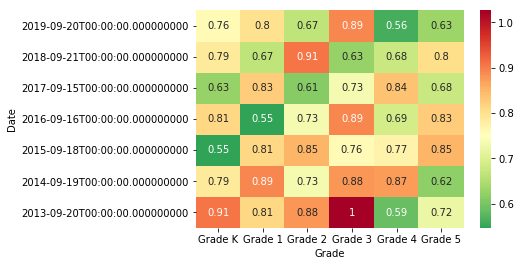

### Flynn

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,72.00%,108.00%,74.00%,60.00%,77.59%,84.48%
2018-09-21,120.00%,78.00%,70.00%,98.00%,86.21%,82.76%
2017-09-15,82.00%,74.00%,106.00%,92.00%,87.93%,98.28%
2016-09-16,90.00%,104.00%,106.00%,110.00%,100.00%,87.93%
2015-09-18,102.00%,108.00%,112.00%,116.00%,86.21%,63.79%
2014-09-19,108.00%,108.00%,108.00%,96.00%,72.41%,77.59%
2013-09-20,110.00%,108.00%,114.00%,80.00%,84.48%,84.48%


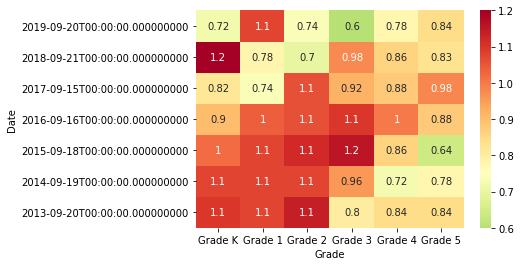

### Lakeshore

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,82.67%,101.33%,97.33%,88.00%,70.11%,72.41%
2018-09-21,102.67%,105.33%,84.00%,92.00%,70.11%,87.36%
2017-09-15,102.67%,96.00%,97.33%,81.33%,88.51%,96.55%
2016-09-16,92.00%,97.33%,78.67%,108.00%,95.40%,77.01%
2015-09-18,98.67%,86.67%,109.33%,100.00%,78.16%,86.21%
2014-09-19,100.00%,106.67%,101.33%,96.00%,85.06%,66.67%
2013-09-20,102.67%,106.67%,89.33%,101.33%,72.41%,82.76%


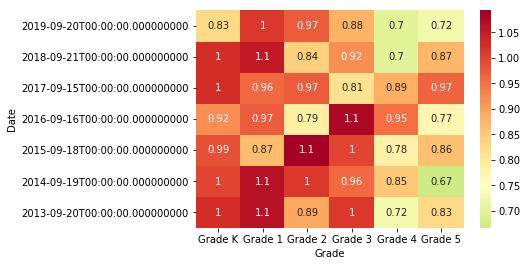

### Locust Lane

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,62.67%,61.33%,46.67%,53.33%,45.98%,44.83%
2018-09-21,60.00%,52.00%,53.33%,56.00%,44.83%,51.72%
2017-09-15,65.33%,54.67%,53.33%,57.33%,54.02%,52.87%
2016-09-16,61.33%,54.67%,50.67%,72.00%,52.87%,51.72%
2015-09-18,60.00%,54.67%,68.00%,58.67%,50.57%,43.68%
2014-09-19,58.67%,72.00%,58.67%,61.33%,51.72%,56.32%
2013-09-20,68.00%,58.67%,64.00%,65.33%,51.72%,59.77%


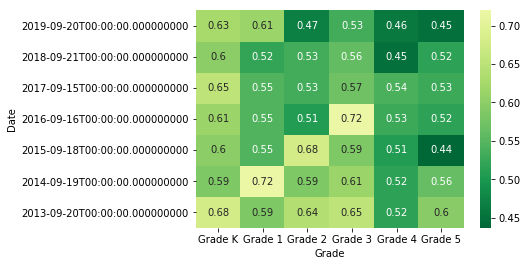

### Longfellow

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,81.33%,61.33%,58.67%,58.67%,52.87%,45.98%
2018-09-21,61.33%,58.67%,65.33%,58.67%,42.53%,48.28%
2017-09-15,60.00%,65.33%,57.33%,52.00%,45.98%,55.17%
2016-09-16,62.67%,54.67%,53.33%,42.67%,51.72%,48.28%
2015-09-18,64.00%,60.00%,56.00%,65.33%,52.87%,47.13%
2014-09-19,64.00%,61.33%,62.67%,60.00%,51.72%,64.37%
2013-09-20,70.67%,81.33%,65.33%,58.67%,58.62%,37.93%


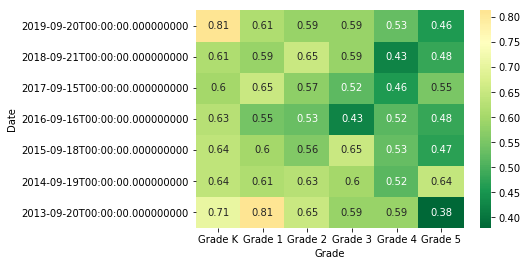

### Manz

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,101.33%,76.00%,102.67%,85.33%,96.55%,64.37%
2018-09-21,84.00%,108.00%,112.00%,112.00%,67.82%,90.80%
2017-09-15,109.33%,97.33%,112.00%,92.00%,89.66%,70.11%
2016-09-16,93.33%,112.00%,89.33%,104.00%,75.86%,70.11%
2015-09-18,110.67%,90.67%,100.00%,82.67%,70.11%,60.92%
2014-09-19,86.67%,97.33%,84.00%,92.00%,66.67%,80.46%
2013-09-20,97.33%,84.00%,93.33%,85.33%,86.21%,65.52%


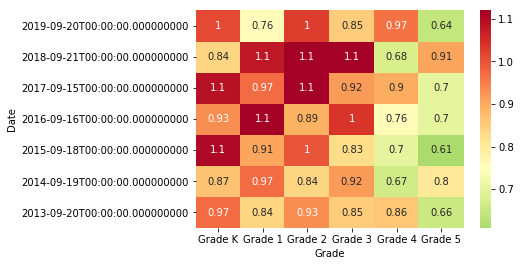

### Meadowview

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,90.67%,82.67%,106.67%,110.67%,87.36%,95.40%
2018-09-21,86.67%,96.00%,112.00%,112.00%,86.21%,85.06%
2017-09-15,94.67%,94.67%,105.33%,101.33%,90.80%,81.61%
2016-09-16,89.33%,100.00%,108.00%,104.00%,90.80%,100.00%
2015-09-18,86.67%,109.33%,106.67%,93.33%,89.66%,83.91%
2014-09-19,105.33%,90.67%,94.67%,92.00%,75.86%,66.67%
2013-09-20,93.33%,104.00%,94.67%,88.00%,65.52%,94.25%


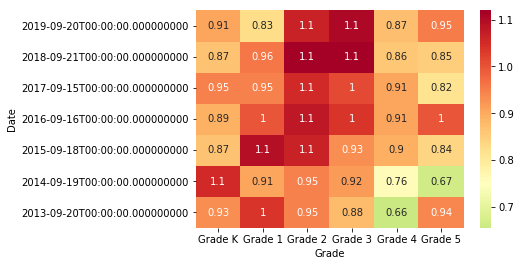

### Northwoods

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,85.33%,81.33%,82.67%,78.67%,58.62%,64.37%
2018-09-21,84.00%,85.33%,73.33%,73.33%,64.37%,83.91%
2017-09-15,80.00%,81.33%,70.67%,77.33%,85.06%,82.76%
2016-09-16,97.33%,73.33%,80.00%,96.00%,77.01%,72.41%
2015-09-18,70.67%,85.33%,89.33%,94.67%,74.71%,67.82%
2014-09-19,82.67%,88.00%,97.33%,85.33%,70.11%,55.17%
2013-09-20,96.00%,106.67%,81.33%,88.00%,63.22%,63.22%


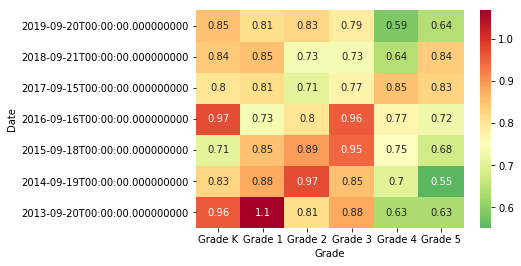

### Putnam Heights

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,93.33%,96.00%,92.00%,92.00%,90.80%,80.46%
2018-09-21,96.00%,89.33%,94.67%,94.67%,77.01%,91.95%
2017-09-15,77.33%,94.67%,88.00%,88.00%,94.25%,90.80%
2016-09-16,92.00%,94.67%,70.67%,100.00%,78.16%,83.91%
2015-09-18,96.00%,68.00%,101.33%,97.33%,73.56%,70.11%
2014-09-19,58.67%,94.67%,84.00%,78.67%,70.11%,72.41%
2013-09-20,85.33%,73.33%,69.33%,74.67%,68.97%,74.71%


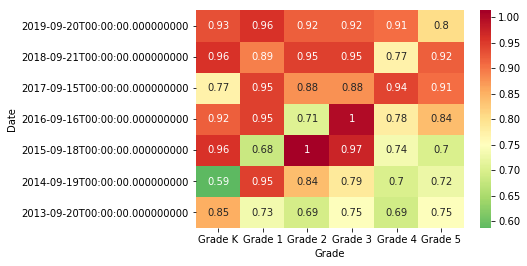

### Robbins

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,82.00%,89.00%,89.00%,89.00%,65.52%,74.14%
2018-09-21,87.00%,75.00%,74.00%,74.00%,78.45%,81.90%
2017-09-15,74.00%,89.00%,68.00%,94.00%,79.31%,81.03%
2016-09-16,84.00%,62.00%,84.00%,89.00%,75.86%,66.38%
2015-09-18,69.00%,77.00%,90.00%,96.00%,66.38%,74.14%
2014-09-19,74.00%,87.00%,94.00%,75.00%,75.00%,84.48%
2013-09-20,82.00%,85.00%,76.00%,75.00%,81.90%,85.34%


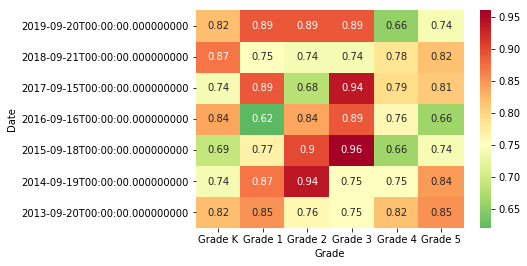

### Roosevelt

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,98.00%,104.00%,86.00%,96.00%,67.24%,77.59%
2018-09-21,96.00%,90.00%,88.00%,88.00%,82.76%,91.38%
2017-09-15,88.00%,94.00%,92.00%,102.00%,87.93%,91.38%
2016-09-16,96.00%,92.00%,100.00%,110.00%,93.10%,72.41%
2015-09-18,102.00%,106.00%,114.00%,122.00%,74.14%,74.14%
2014-09-19,100.00%,118.00%,110.00%,90.00%,70.69%,89.66%
2013-09-20,112.00%,96.00%,88.00%,88.00%,86.21%,70.69%


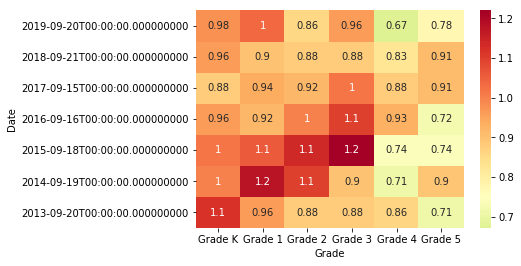

### Sherman

Grade,Grade K,Grade 1,Grade 2,Grade 3,Grade 4,Grade 5
Date,,,,,,
2019-09-20,91.00%,86.00%,71.00%,89.00%,62.07%,65.52%
2018-09-21,79.00%,73.00%,65.00%,65.00%,69.83%,71.55%
2017-09-15,81.00%,86.00%,67.00%,81.00%,73.28%,62.93%
2016-09-16,91.00%,70.00%,80.00%,86.00%,68.97%,58.62%
2015-09-18,78.00%,80.00%,76.00%,83.00%,62.93%,65.52%
2014-09-19,88.00%,73.00%,90.00%,77.00%,68.97%,56.90%
2013-09-20,76.00%,84.00%,82.00%,73.00%,56.90%,58.62%


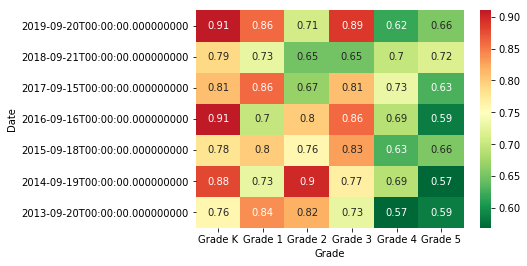

In [4]:
school_grade_capacity = pd.DataFrame([
    ('Davey','Grade K',75),('Davey','Grade 1',75),('Davey','Grade 2',75),('Davey','Grade 3',75),('Davey','Grade 4',87),('Davey','Grade 5',87),
    ('Flynn','Grade K',50),('Flynn','Grade 1',50),('Flynn','Grade 2',50),('Flynn','Grade 3',50),('Flynn','Grade 4',58),('Flynn','Grade 5',58),
    ('Lakeshore','Grade K',75),('Lakeshore','Grade 1',75),('Lakeshore','Grade 2',75),('Lakeshore','Grade 3',75),('Lakeshore','Grade 4',87),('Lakeshore','Grade 5',87),
    ('Locust Lane','Grade K',75),('Locust Lane','Grade 1',75),('Locust Lane','Grade 2',75),('Locust Lane','Grade 3',75),('Locust Lane','Grade 4',87),('Locust Lane','Grade 5',87),
    ('Longfellow','Grade K',75),('Longfellow','Grade 1',75),('Longfellow','Grade 2',75),('Longfellow','Grade 3',75),('Longfellow','Grade 4',87),('Longfellow','Grade 5',87),
    ('Manz','Grade K',75),('Manz','Grade 1',75),('Manz','Grade 2',75),('Manz','Grade 3',75),('Manz','Grade 4',87),('Manz','Grade 5',87),
    ('Meadowview','Grade K',75),('Meadowview','Grade 1',75),('Meadowview','Grade 2',75),('Meadowview','Grade 3',75),('Meadowview','Grade 4',87),('Meadowview','Grade 5',87),
    ('Northwoods','Grade K',75),('Northwoods','Grade 1',75),('Northwoods','Grade 2',75),('Northwoods','Grade 3',75),('Northwoods','Grade 4',87),('Northwoods','Grade 5',87),
    ('Putnam Heights','Grade K',75),('Putnam Heights','Grade 1',75),('Putnam Heights','Grade 2',75),('Putnam Heights','Grade 3',75),('Putnam Heights','Grade 4',87),('Putnam Heights','Grade 5',87),
    ('Robbins','Grade K',100),('Robbins','Grade 1',100),('Robbins','Grade 2',100),('Robbins','Grade 3',100),('Robbins','Grade 4',116),('Robbins','Grade 5',116),
    ('Roosevelt','Grade K',50),('Roosevelt','Grade 1',50),('Roosevelt','Grade 2',50),('Roosevelt','Grade 3',50),('Roosevelt','Grade 4',58),('Roosevelt','Grade 5',58),
    ('Sherman','Grade K',100),('Sherman','Grade 1',100),('Sherman','Grade 2',100),('Sherman','Grade 3',100),('Sherman','Grade 4',116),('Sherman','Grade 5',116)
], columns=['School','Grade','Maximum Capacity']).reset_index()

students_per_grade = df.groupby(['Date','School','Grade']).sum().reset_index().merge(school_grade_capacity)
students_per_grade['Grade'] = pd.Categorical(students_per_grade['Grade'], ['Grade K', 'Grade 1', 'Grade 2', 'Grade 3', 'Grade 4', 'Grade 5'])

del students_per_grade['index']

students_per_grade['Capacity Ratio'] = students_per_grade['Students'] / students_per_grade['Maximum Capacity']
students_per_grade['Capacity Ratio'] = students_per_grade['Capacity Ratio']
students_per_grade['Capacity Percent'] = students_per_grade['Capacity Ratio'].apply(as_percent)

for school_name, school_capacity_ratio in students_per_grade.groupby(['School']):
    display(Markdown(f'### {school_name}'))
    display(school_capacity_ratio.sort_values('Grade').set_index(['Date', 'Grade']).unstack().sort_values('Date', ascending=False)['Capacity Percent'])
    
    ax = sns.heatmap(school_capacity_ratio.sort_values('Grade').set_index(['Date', 'Grade']).unstack()['Capacity Ratio'], center=.75, annot=True, cmap="RdYlGn_r")
    ax.invert_yaxis()
    plt.show()

### Observations
The district classroom size guidelines difference for K-3 and 4-5 are clearly visible in the heatmap.

Schools under stress -- Manz, Meadowview, Putnam Heights, and Roosevelt -- are easily identified by their heatmaps.

Cohort groups are easily identified by their diagnal progression in the heatmap.